**Name:** Krish Thakkar  
**SAP:** 60009230213

**Batch :** D2-2  
**Lab:** ML Lab 4


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!ls

'Breast_cancer_data (1).csv'   german_credit_data.csv   sample_data   Social_Network_Ads.csv


In [ ]:
df = pd.read_csv('Breast_cancer_data (1).csv')

In [ ]:
df.head(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
df.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [ ]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


<Axes: >

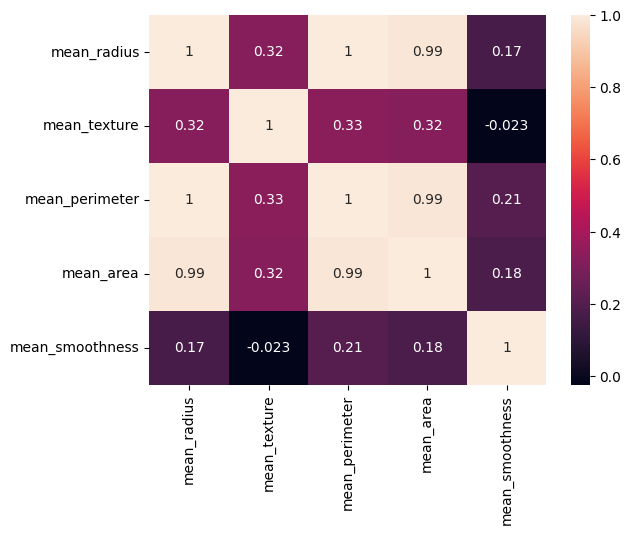

In [ ]:
k=df.iloc[:,:-1]
sns.heatmap(k.corr(), annot=True)

In [ ]:
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

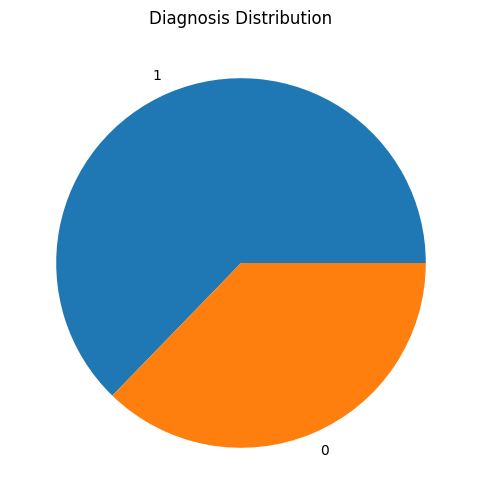

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(df['diagnosis'].value_counts(), labels=df['diagnosis'].value_counts().index)
plt.title('Diagnosis Distribution')
plt.show()

<Axes: xlabel='mean_texture', ylabel='Count'>

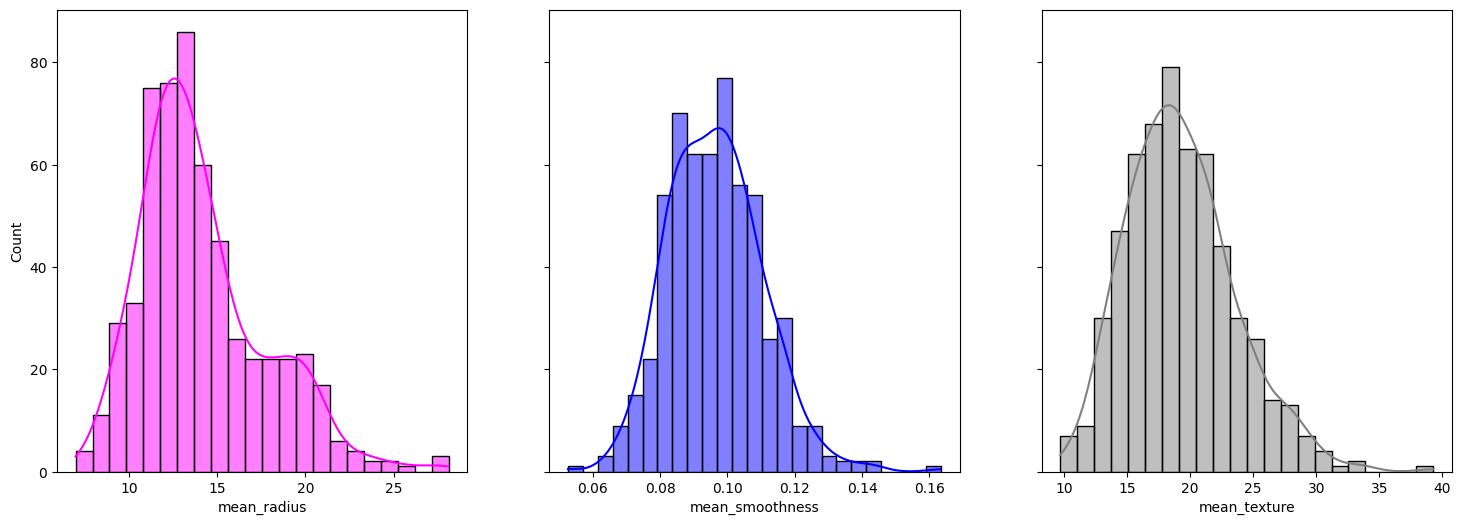

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(df, ax=axes[0], x="mean_radius", kde=True, color='magenta')
sns.histplot(df, ax=axes[1], x="mean_smoothness", kde=True, color='blue')
sns.histplot(df, ax=axes[2], x="mean_texture", kde=True,color='grey')

In [ ]:
df = df[["mean_radius", "mean_texture", "mean_smoothness", "diagnosis"]]

In [ ]:
df.head(5)

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0


In [ ]:
def calc_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

In [ ]:
def calc_likelihood(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

In [ ]:
def naive_bayes_gaussian(df, X, Y):
    features = list(df.columns)[:-1]
    prior = calc_prior(df, Y)
    Y_pred = []
    for x in X:
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calc_likelihood(df, features[i], x[i], Y, labels[j])
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]
        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df, test_size=0.25, random_state=33)

In [ ]:
X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="diagnosis")

In [ ]:
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[44 10]
 [ 1 88]]
0.9411764705882354


**Dataset 2**

In [ ]:
df2 = pd.read_csv('Social_Network_Ads.csv')

In [ ]:
df2.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df2.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df2.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df2.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

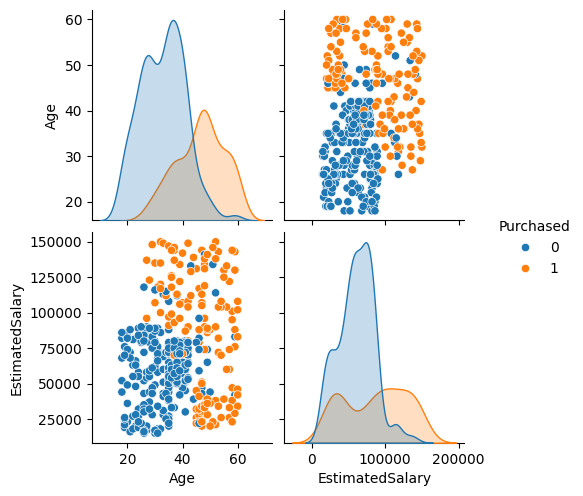

In [ ]:
sns.pairplot(df2[['Age', 'EstimatedSalary', 'Purchased']], hue='Purchased')
plt.show()

In [ ]:
x = df2.iloc[:,[1,2,3]].values
y = df2.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:, 0] = le.fit_transform(x[:, 0])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=61)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(x_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.92


In [ ]:
print(f1_score(y_test, y_pred))

0.8857142857142857


In [ ]:
# dataset 3

In [ ]:
df3 = pd.read_csv('german_credit_data.csv')

In [ ]:
df3.head(5)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
df3.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [ ]:
df3.dropna(inplace=True)

In [ ]:
df3 = df3.drop(['Unnamed: 0'], axis=1)

In [ ]:
df3.describe()

,Age,Job,Credit amount,Duration
count,522.000000,522.000000,522.000000,522.000000
mean,34.888889,1.875479,3278.745211,21.339080
std,11.787918,0.682811,2929.155177,12.474079
min,19.000000,0.000000,276.000000,6.000000
25%,26.000000,2.000000,1297.500000,12.000000
50%,31.500000,2.000000,2326.500000,18.000000
75%,41.000000,2.000000,3971.250000,26.750000
max,75.000000,3.000000,18424.000000,72.000000


In [ ]:
df3.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 1 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               522 non-null    int64 
 1   Sex               522 non-null    object
 2   Job               522 non-null    int64 
 3   Housing           522 non-null    object
 4   Saving accounts   522 non-null    object
 5   Checking account  522 non-null    object
 6   Credit amount     522 non-null    int64 
 7   Duration          522 non-null    int64 
 8   Purpose           522 non-null    object
 9   Risk              522 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 61.0+ KB


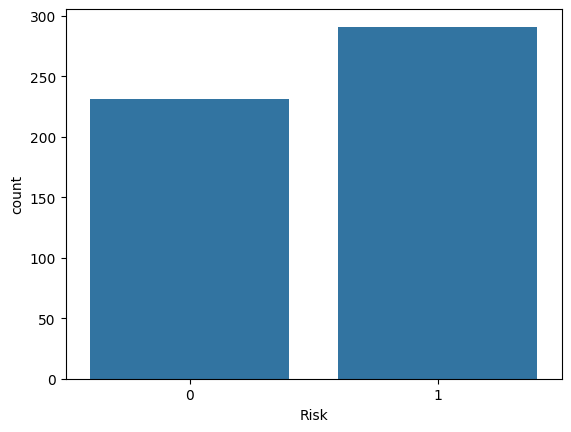

In [ ]:
sns.countplot(x='Risk', data=df3)
plt.show()

In [ ]:
X = df3.drop('Risk', axis=1)
Y = df3['Risk']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=99)

In [ ]:
cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

In [ ]:
df3.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
for col in cols:
    df3[col] = label_encoder.fit_transform(df3[col])

In [ ]:
df3.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,0,2,1,0,1,5951,48,5,0
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0
7,35,1,3,2,0,1,6948,36,1,1
9,28,1,3,1,0,1,5234,30,1,0


In [ ]:
g_bayes = GaussianNB()

In [ ]:
g_bayes.fit(X_train, Y_train)

GaussianNB()

In [ ]:
Y_pred = g_bayes.predict(X_test)

In [ ]:
print(f"Accuracy: {accuracy_score(Y_test, Y_pred)}")

Accuracy: 0.6641221374045801


In [ ]:
print(f"F1-Score: {f1_score(Y_test, Y_pred)}")

F1-Score: 0.738095238095238
